# Running multiple simulations in parallel

You can run multiple simulations in parallel with the function `ph.planet.evolve_batch`.

`evolve_batch` takes a list of planets to evolve, and a list of arguments for the `evolve` function for each planet.
It returns a list of dataframes with the results of each simulation.

```c
results = ph.planet.evolve_batch(planets, evo_args)
```

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import photoevolver as ph
from photoevolver import models
import Mors as mors

In [16]:
# Load models
star = mors.Star(Mstar = 1.0, percentile = 50.0)
models = dict(
    star_model = star,
    core_model = models.core_otegi20,
    envelope_model = models.envelope_chen16,
)

# Create planets
masses = np.linspace(8, 15, num = 5)
planets = [ ph.Planet(mass = m, radius = 2.5, period = 10) for m in masses ]
for p in planets:
    p.set_models(**models)

evo_args = [ dict(start = 10, end = 1000, step = 1, progressbar = True) ] * len(planets)

# Run sims
results = ph.planet.evolve_batch(planets, evo_args)


0.000%|                                                                                                | 0.000/990 [00:00<?]

0.000%|                                                                                                | 0.000/990 [00:00<?]


0.000%|                                                                                                | 0.000/990 [00:00<?]



8.182%|███████▍                                                                                   | 81.000/990 [00:00<00:03]

7.879%|███████▏                                                                                   | 78.000/990 [00:00<00:03]



20.909%|██████████████████▌                                                                      | 207.000/990 [00:00<00:01]

18.990%|████████████████▉                                                                        | 188.000/990 [00:00<00:01]



32.020%|████████████████████████████▍                                                            | 317.000/990

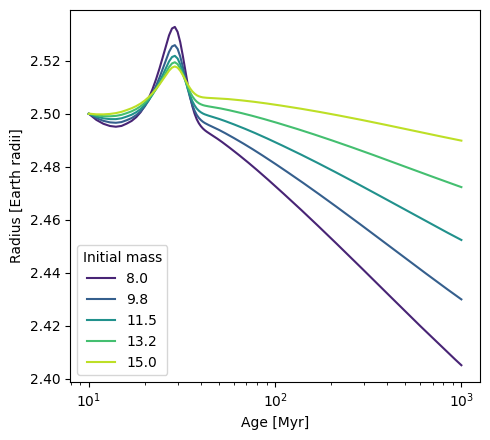

In [18]:

fig, ax = plt.subplots(1, 1, figsize=(5, 4.5))

ax.set_xlabel("Age [Myr]")
ax.set_ylabel("Radius [Earth radii]")
ax.set_xscale("log")

colors = iter(plt.cm.viridis(np.linspace(0.1, 0.9, len(planets))))

for mass,evo in zip(masses, results):
    ax.plot(evo['age'], evo['radius'], c = next(colors), label = f"{mass:.1f}")

ax.legend(title = "Initial mass")
fig.tight_layout()
plt.show()